In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitues and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to th cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
cities

['zhigansk',
 'ushuaia',
 'mataura',
 'albany',
 'westport',
 'jamestown',
 'hermanus',
 'awjilah',
 'norman wells',
 'panama city',
 'carnarvon',
 'bredasdorp',
 'srednekolymsk',
 'bluff',
 'atuona',
 'ngunguru',
 'severo-kurilsk',
 'lebu',
 'kodiak',
 'kalabo',
 'hilo',
 'saleaula',
 'lata',
 'barrow',
 'khatanga',
 'illoqqortoormiut',
 'kinango',
 'wanaka',
 'nyimba',
 'busselton',
 'alofi',
 'steamboat springs',
 'new norfolk',
 'buckeye',
 'lagoa',
 'avarua',
 'natal',
 'likasi',
 'vilyuysk',
 'cordoba',
 'qaanaaq',
 'riyadh',
 'palmer',
 'kimbe',
 'punta arenas',
 'santa isabel do rio negro',
 'qaqortoq',
 'taolanaro',
 'bandarbeyla',
 'beberibe',
 'narasannapeta',
 'nanortalik',
 'nizhneyansk',
 'rikitea',
 'gat',
 'mys shmidta',
 'saskylakh',
 'ballina',
 'arraial do cabo',
 'sitka',
 'coahuayana',
 'henties bay',
 'mekhe',
 'katima mulilo',
 'saky',
 'lavrentiya',
 'gladstone',
 'altus',
 'oktyabrskiy',
 'manta',
 'dikson',
 'cape town',
 'swan river',
 'yellowknife',
 'hobart

In [6]:
# Import the rquests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=df78596e3f11cea287c571d2656223f2


In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=df78596e3f11cea287c571d2656223f2&q=north platte


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 
    

Processing Record 1 of Set 13 | zhigansk
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | mataura
Processing Record 4 of Set 13 | albany
Processing Record 5 of Set 13 | westport
Processing Record 6 of Set 13 | jamestown
Processing Record 7 of Set 13 | hermanus
Processing Record 8 of Set 13 | awjilah
Processing Record 9 of Set 13 | norman wells
Processing Record 10 of Set 13 | panama city
Processing Record 11 of Set 13 | carnarvon
Processing Record 12 of Set 13 | bredasdorp
Processing Record 13 of Set 13 | srednekolymsk
Processing Record 14 of Set 13 | bluff
Processing Record 15 of Set 13 | atuona
Processing Record 16 of Set 13 | ngunguru
Processing Record 17 of Set 13 | severo-kurilsk
Processing Record 18 of Set 13 | lebu
Processing Record 19 of Set 13 | kodiak
Processing Record 20 of Set 13 | kalabo
Processing Record 21 of Set 13 | hilo
Processing Record 22 of Set 13 | saleaula
City not found. Skipping...
Processing Record 23 of Set 13 | lata
Processing Record 2

Processing Record 38 of Set 16 | lompoc
Processing Record 39 of Set 16 | dunedin
Processing Record 40 of Set 16 | mahebourg
Processing Record 41 of Set 16 | balabac
Processing Record 42 of Set 16 | lima
Processing Record 43 of Set 16 | amlame
Processing Record 44 of Set 16 | mangochi
Processing Record 45 of Set 16 | puerto ayora
Processing Record 46 of Set 16 | emerald
Processing Record 47 of Set 16 | pareora
Processing Record 48 of Set 16 | susangerd
Processing Record 49 of Set 16 | flinders
Processing Record 50 of Set 16 | ribeira grande
Processing Record 1 of Set 17 | rheda-wiedenbruck
Processing Record 2 of Set 17 | rio gallegos
Processing Record 3 of Set 17 | poum
Processing Record 4 of Set 17 | mrirt
City not found. Skipping...
Processing Record 5 of Set 17 | mouzouras
Processing Record 6 of Set 17 | ancud
Processing Record 7 of Set 17 | noumea
Processing Record 8 of Set 17 | springville
Processing Record 9 of Set 17 | kutum
Processing Record 10 of Set 17 | dakar
Processing Recor

Processing Record 25 of Set 20 | shushtar
Processing Record 26 of Set 20 | cidreira
Processing Record 27 of Set 20 | san andres
Processing Record 28 of Set 20 | saint-joseph
Processing Record 29 of Set 20 | gravdal
Processing Record 30 of Set 20 | namibe
Processing Record 31 of Set 20 | doka
Processing Record 32 of Set 20 | northam
Processing Record 33 of Set 20 | rawson
Processing Record 34 of Set 20 | lambarene
Processing Record 35 of Set 20 | formby
Processing Record 36 of Set 20 | najran
Processing Record 37 of Set 20 | louisbourg
City not found. Skipping...
Processing Record 38 of Set 20 | sao felix do xingu
Processing Record 39 of Set 20 | esperance
Processing Record 40 of Set 20 | warman
Processing Record 41 of Set 20 | phibun mangsahan
Processing Record 42 of Set 20 | saldanha
Processing Record 43 of Set 20 | alihe
Processing Record 44 of Set 20 | maragogi
Processing Record 45 of Set 20 | kavieng
Processing Record 46 of Set 20 | tsilna
Processing Record 47 of Set 20 | nishihara

Processing Record 12 of Set 24 | mporokoso
Processing Record 13 of Set 24 | tabou
Processing Record 14 of Set 24 | cabedelo
Processing Record 15 of Set 24 | haibowan
City not found. Skipping...
Processing Record 16 of Set 24 | virginia beach
Processing Record 17 of Set 24 | umm kaddadah
Processing Record 18 of Set 24 | boyolangu
Processing Record 19 of Set 24 | gunjur
Processing Record 20 of Set 24 | filadelfia
Processing Record 21 of Set 24 | geraldton
Processing Record 22 of Set 24 | takoradi
Processing Record 23 of Set 24 | svetlogorsk
Processing Record 24 of Set 24 | lugovoy
Processing Record 25 of Set 24 | chernyshevskiy
Processing Record 26 of Set 24 | morgan city
Processing Record 27 of Set 24 | la tuque
Processing Record 28 of Set 24 | lhokseumawe
Processing Record 29 of Set 24 | solnechnyy
Processing Record 30 of Set 24 | jurm
Processing Record 31 of Set 24 | sawtell
Processing Record 32 of Set 24 | hinton
Processing Record 33 of Set 24 | angoche
Processing Record 34 of Set 24

In [13]:
len(city_data)

579

In [15]:
# Convert the array of dictionaires to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigansk,66.7697,123.3711,-47.20,75,96,4.07,RU,2021-01-30 17:00:04
1,Ushuaia,-54.8000,-68.3000,51.80,62,20,27.63,AR,2021-01-30 16:58:14
2,Mataura,-46.1927,168.8643,48.00,80,50,8.01,NZ,2021-01-30 17:00:06
3,Albany,42.6001,-73.9662,16.00,51,0,1.99,US,2021-01-30 16:58:13
4,Westport,41.1415,-73.3579,24.01,42,1,16.11,US,2021-01-30 17:00:07
5,Jamestown,42.0970,-79.2353,25.00,86,90,4.90,US,2021-01-30 17:00:09
6,Hermanus,-34.4187,19.2345,73.00,74,0,7.00,ZA,2021-01-30 17:00:10
7,Awjilah,29.1081,21.2869,66.51,33,0,9.35,LY,2021-01-30 17:00:10
8,Norman Wells,65.2820,-126.8329,-27.40,75,75,1.70,CA,2021-01-30 16:55:19
9,Panama City,8.9936,-79.5197,89.60,54,20,9.22,PA,2021-01-30 16:56:49


In [17]:
# reorder the columnes
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhigansk,RU,2021-01-30 17:00:04,66.7697,123.3711,-47.20,75,96,4.07
1,Ushuaia,AR,2021-01-30 16:58:14,-54.8000,-68.3000,51.80,62,20,27.63
2,Mataura,NZ,2021-01-30 17:00:06,-46.1927,168.8643,48.00,80,50,8.01
3,Albany,US,2021-01-30 16:58:13,42.6001,-73.9662,16.00,51,0,1.99
4,Westport,US,2021-01-30 17:00:07,41.1415,-73.3579,24.01,42,1,16.11
5,Jamestown,US,2021-01-30 17:00:09,42.0970,-79.2353,25.00,86,90,4.90
6,Hermanus,ZA,2021-01-30 17:00:10,-34.4187,19.2345,73.00,74,0,7.00
7,Awjilah,LY,2021-01-30 17:00:10,29.1081,21.2869,66.51,33,0,9.35
8,Norman Wells,CA,2021-01-30 16:55:19,65.2820,-126.8329,-27.40,75,75,1.70
9,Panama City,PA,2021-01-30 16:56:49,8.9936,-79.5197,89.60,54,20,9.22


In [18]:
# Create the output files (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [19]:
# Extract relevant fields form the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


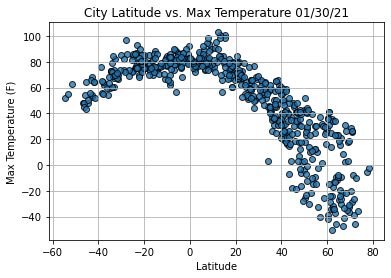

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

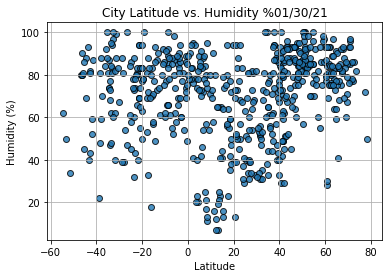

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity %"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

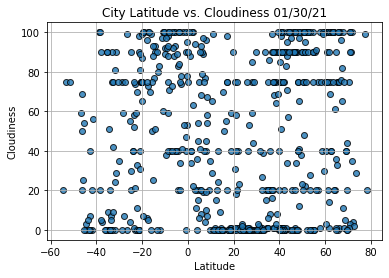

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

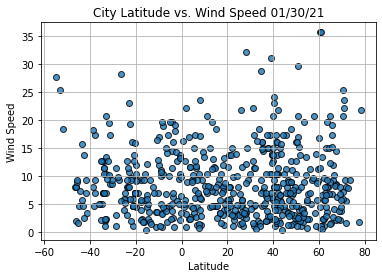

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()